In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("kidney_disease.csv")
pd.set_option('display.max_columns', None)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
# Dropping the id column
df=df.drop(["id"],axis=1)
df.shape

(400, 25)

In [7]:
# Removing identical rows (if any) 
df=df.drop_duplicates()
df.shape # There is no identical row

(400, 25)

In [8]:
df1=df.dropna(axis=0,how='all')# Dropping those rows having all nan values (if any)
df1.shape

(400, 25)

In [9]:
df.isnull().sum().nlargest(len(df.columns))

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

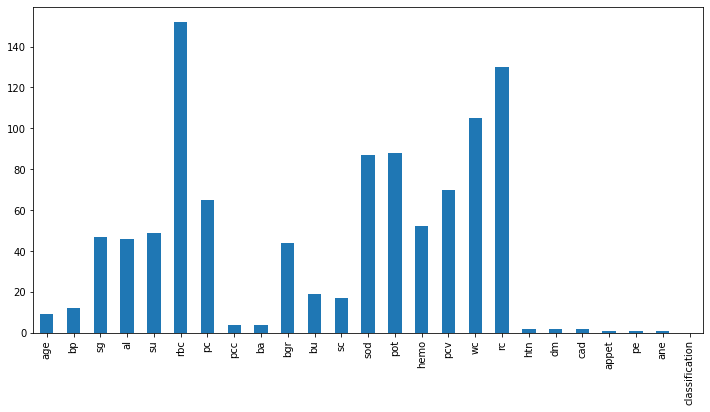

In [11]:
fig,ax=plt.subplots(figsize=(12,6))
df.isnull().sum().plot.bar()

<AxesSubplot:>

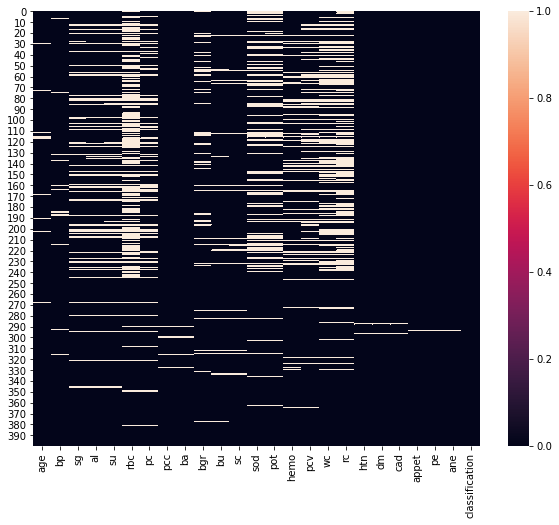

In [12]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(df.isnull())# Nans in the dataset

In [13]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [14]:
def Label(val):
    if val =='ckd\t':
        return 'ckd'
    else:
        return val
df['classification']=df['classification'].apply(Label)
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [15]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
numerical_features

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [16]:
categorical_features=[feature for feature in df.columns if feature not in numerical_features]
categorical_features

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [17]:
# Finding the number of continuous numerical features and discrete numerical features
continuous_num_feature,discrete_num_feature=[],[]
for feature in numerical_features:
    if len(df[feature].unique())>=30:
        continuous_num_feature.append(feature)
    else:
        discrete_num_feature.append(feature)
print(f"the dataset has {len(continuous_num_feature)} continuous numerical features and {len(discrete_num_feature)} categorical numerical features")

the dataset has 7 continuous numerical features and 4 categorical numerical features


In [18]:
# Fixing the Nan values of the categorical features
df[categorical_features].isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [19]:
df['ane'].value_counts() 

no     339
yes     60
Name: ane, dtype: int64

In [20]:
df['ane']=df['ane'].fillna('no')# Filling the Nan with the most frequent category
df['ane'].isnull().sum()

0

In [21]:
df['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [22]:
df['pe']=df['pe'].fillna('no')# Filling the Nan with the most frequent category
df['pe'].isnull().sum()

0

In [23]:
df['appet'].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [24]:
df['appet']=df['appet'].fillna('good')# Filling the Nan with the most frequent category
df['appet'].isnull().sum()

0

In [25]:
df['cad'].value_counts() # Fixing the error and then filling the nan with the most frequent category

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [26]:
def func1(val):
    if val == '\tno':
        return 'no'
    else:
        return val
    
df['cad']=df['cad'].apply(func1)
df['cad']=df['cad'].fillna('no')
df['cad'].isnull().sum()

0

In [27]:
df['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [28]:
def func2(val):
    if val == '\tno':
        return 'no'
    elif val == '\tyes':
        return 'yes'
    elif val==' yes':
        return 'yes'
    else:
        return val
    
df['dm']=df['dm'].apply(func2)
df['dm']=df['dm'].fillna('no')
df['dm'].isnull().sum()

0

In [29]:
df['dm'].value_counts()

no     263
yes    137
Name: dm, dtype: int64

In [30]:
df['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [31]:
df['htn']=df['htn'].fillna('no')
df['htn'].isnull().sum()

0

In [32]:
df['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [33]:
df['pcc']=df['pcc'].fillna('notpresent')
df['pcc'].isnull().sum()

0

In [34]:
df['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [35]:
df['ba']=df['ba'].fillna('notpresent')
df['ba'].isnull().sum()

0

In [36]:
df['pc'].value_counts() # Fixing the Nan of pc after eda

normal      259
abnormal     76
Name: pc, dtype: int64

In [37]:
df['pc'].fillna('Unknown')
df['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [38]:
df['pcv'].value_counts() # pcv is a continous feature but it was treated as a categorical feature due to some error in the data

41      21
52      21
48      19
44      19
40      16
43      14
42      13
45      13
36      12
50      12
33      12
28      12
32      12
34      11
37      11
35       9
46       9
30       9
29       9
31       8
39       7
24       7
26       6
38       5
54       4
51       4
49       4
53       4
47       4
25       3
22       3
27       3
23       2
19       2
17       1
14       1
18       1
15       1
16       1
\t43     1
21       1
\t?      1
20       1
9        1
Name: pcv, dtype: int64

In [39]:
import numpy as np
df['pcv'] = df['pcv'].replace(['\t?','\t43'],[np.NaN,43])
df['pcv'].isnull().sum()

71

In [40]:
df['pcv']=df['pcv'].astype('float')
df['pcv'].dtype

dtype('float64')

<AxesSubplot:xlabel='pcv', ylabel='Count'>

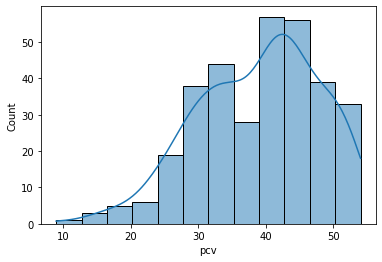

In [41]:
sns.histplot(data=df[['pcv']],x='pcv',kde=True)

In [42]:
# Adding pcv to the numerical features list
continuous_num_feature.append('pcv')

In [43]:
df['wc'].value_counts()# wc is a continous feature but it was treated as a categorical feature due to some error in the data

9800      11
6700      10
9600       9
7200       9
9200       9
          ..
9900       1
\t8400     1
11200      1
5900       1
\t6200     1
Name: wc, Length: 92, dtype: int64

In [44]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [45]:
df['wc'] = df['wc'].replace(['\t?','\t6200','\t8400'],[np.NaN,6200,8400])
df['wc'].isnull().sum()

106

In [46]:
df['wc']=df['wc'].astype('float')
df['wc'].dtype

dtype('float64')

<AxesSubplot:xlabel='wc', ylabel='Count'>

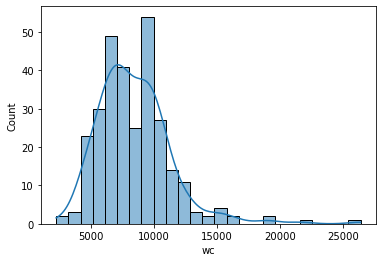

In [47]:
sns.histplot(data=df[['wc']],x='wc',kde=True)

In [48]:
# Adding wc to the numerical features list
continuous_num_feature.append('wc')
continuous_num_feature

['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc']

In [49]:
df['rc'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
4.6     9
3.4     9
5.5     8
3.7     8
5.0     8
6.1     8
5.9     8
5.8     7
3.8     7
5.4     7
5.3     7
4.2     6
4.3     6
5.6     6
5.7     5
4.1     5
6.2     5
5.1     5
3.2     5
6.5     5
4.4     5
6.4     5
6.0     4
3.6     4
6.3     4
4       3
4.0     3
3.3     3
3.5     3
3.0     2
3.1     2
2.6     2
2.9     2
2.1     2
2.7     2
2.5     2
2.8     2
5       2
\t?     1
3       1
2.3     1
8.0     1
2.4     1
Name: rc, dtype: int64

<AxesSubplot:xlabel='rc', ylabel='Count'>

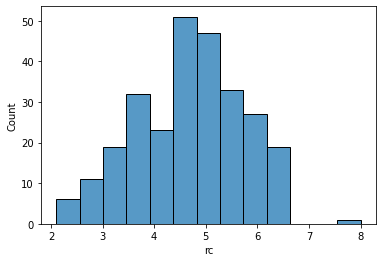

In [50]:
df['rc'] = df['rc'].replace('\t?',np.NaN)
df['rc']=df['rc'].astype('float')
sns.histplot(x='rc',data=df[['rc']])

In [51]:
# Adding rc to the numerical features list
continuous_num_feature.append('rc')
continuous_num_feature

['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

In [52]:
df['rbc'].value_counts()# Replcing the nan after eda

normal      201
abnormal     47
Name: rbc, dtype: int64

In [53]:
# Updating the categorical feature list
for i in ['pcv','wc','rc']:
    categorical_features.remove(i)
categorical_features

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [54]:
df[categorical_features].isnull().sum()

rbc               152
pc                 65
pcc                 0
ba                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [55]:
df['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [56]:
data=df.copy()

In [57]:
# Since pc has a huge number of nan values in it lets check the correlation of it with the other categorical features
corr_data=pd.get_dummies(data[categorical_features],drop_first=True)
corr_data.corr()['pc_normal'].nlargest(len(categorical_features))

pc_normal                1.000000
classification_notckd    0.474244
rbc_normal               0.354296
cad_yes                 -0.187919
ba_present              -0.212202
appet_poor              -0.247514
ane_yes                 -0.290902
pcc_present             -0.327659
pe_yes                  -0.336275
dm_yes                  -0.371697
htn_yes                 -0.392717
Name: pc_normal, dtype: float64

In [58]:
# Using random forest classifier for imputing the nan values of pc with the help of classfication,htn and dm features
def Back_to_Str(val):
    if val ==1:
        return 'normal'
    else:
        return 'abnormal'
from sklearn.ensemble import RandomForestClassifier
x_test=data[data['pc'].isna()]
x_train=data[data['pc'].notna()]
x_train_selected=x_train[['classification','htn','dm']]
x_test_selected=x_test[['classification','htn','dm']]
x_train_selected_dum=pd.get_dummies(x_train_selected,drop_first=True)
x_test_selected_dum=pd.get_dummies(x_test_selected,drop_first=True)
y_train=data[data['pc'].notna()]['pc']
y_train_dum=pd.get_dummies(y_train,drop_first=True)['normal']
rf=RandomForestClassifier()
rf.fit(x_train_selected_dum,y_train_dum)
nan_pred=rf.predict(x_test_selected_dum)
nan_pred_df=pd.DataFrame(nan_pred,columns=['pc'])
nan_pred_df['pc']=nan_pred_df['pc'].apply(Back_to_Str)
part1=pd.concat([x_train[['pc']],x_train.drop('pc',axis=1)],axis=1)
part2=pd.concat([nan_pred_df.reset_index(drop=True),x_test.drop('pc',axis=1).reset_index(drop=True)],axis=1)
part3=pd.concat([part1,part2],axis=0)
data2=part3.reset_index(drop=True)

In [59]:
data2['pc'].value_counts() # Imputed the nan values of the pc feature

normal      324
abnormal     76
Name: pc, dtype: int64

In [60]:
data2[categorical_features].isnull().sum()

rbc               152
pc                  0
pcc                 0
ba                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [61]:
# Since rbc has a huge number of nan values in it lets check the correlation of it with the other categorical features
corr_data=pd.get_dummies(data[categorical_features],drop_first=True)
corr_data.corr()['rbc_normal'].nlargest(len(categorical_features))

rbc_normal               1.000000
classification_notckd    0.677781
pc_normal                0.354296
pcc_present             -0.018023
ba_present              -0.023138
cad_yes                 -0.144956
ane_yes                 -0.156133
pe_yes                  -0.193604
appet_poor              -0.225479
htn_yes                 -0.340866
dm_yes                  -0.377655
Name: rbc_normal, dtype: float64

In [62]:
# Using random forest classifier for imputing the nan values of rbc with the help of classfication,htn,pc and dm features
def Back_to_Str(val):
    if val ==1:
        return 'normal'
    else:
        return 'abnormal'
from sklearn.ensemble import RandomForestClassifier
x_test=data2[data2['rbc'].isna()]
x_train=data2[data2['rbc'].notna()]
x_train_selected=x_train[['classification','htn','dm','pc']]
x_test_selected=x_test[['classification','htn','dm','pc']]
x_train_selected_dum=pd.get_dummies(x_train_selected,drop_first=True)
x_test_selected_dum=pd.get_dummies(x_test_selected,drop_first=True)
y_train=data2[data2['rbc'].notna()]['rbc']
y_train_dum=pd.get_dummies(y_train,drop_first=True)['normal']
rf=RandomForestClassifier()
rf.fit(x_train_selected_dum,y_train_dum)
nan_pred=rf.predict(x_test_selected_dum)
nan_pred_df=pd.DataFrame(nan_pred,columns=['rbc'])
nan_pred_df['rbc']=nan_pred_df['rbc'].apply(Back_to_Str)
part1=pd.concat([x_train[['rbc']],x_train.drop('rbc',axis=1)],axis=1)
part2=pd.concat([nan_pred_df.reset_index(drop=True),x_test.drop('rbc',axis=1).reset_index(drop=True)],axis=1)
part3=pd.concat([part1,part2],axis=0)
data3=part3.reset_index(drop=True)

In [63]:
data3['rbc'].value_counts() # Imputed the nan values of the rbc feature

normal      290
abnormal    110
Name: rbc, dtype: int64

In [64]:
# Making a new column for rbc where nan is 1 and non nan is 0
data3['rbc_nan']=np.where(df['rbc'].isna(),1,0)
data3['rbc_nan'].value_counts()

0    248
1    152
Name: rbc_nan, dtype: int64

In [65]:
data3[categorical_features].isnull().sum() # Imputed the nan of the categorical features

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [66]:
data3[discrete_num_feature].isnull().sum() # Checking the nan of the disrete numerical feartures

bp    12
sg    47
al    46
su    49
dtype: int64

In [67]:
data3['bp'].value_counts()

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
120.0      1
180.0      1
Name: bp, dtype: int64

<AxesSubplot:xlabel='bp', ylabel='Count'>

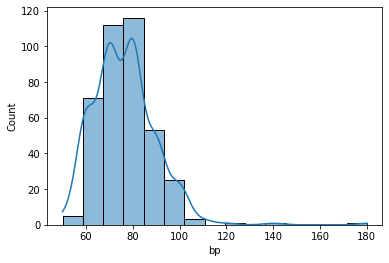

In [68]:
sns.histplot(data=data3[['bp']],x='bp',kde=True,bins=15)

In [69]:
# filling the nan of the bp with its median value
data3['bp']=data3['bp'].fillna(80)
data3['bp'].isnull().sum()

0

In [70]:
data3['sg'].value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

In [71]:
corr_data=pd.get_dummies(data[categorical_features+discrete_num_feature],drop_first=True)
corr_data.corr()['sg'].nlargest(len(categorical_features+discrete_num_feature))
# sg is having a high correlation with the classification,rbc,al,htn,pc and dm

sg                       1.000000
classification_notckd    0.732163
rbc_normal               0.461129
pc_normal                0.358177
cad_yes                 -0.175937
bp                      -0.218836
ba_present              -0.221653
ane_yes                 -0.243071
appet_poor              -0.268958
pcc_present             -0.292960
su                      -0.296234
pe_yes                  -0.299036
htn_yes                 -0.402756
dm_yes                  -0.433308
al                      -0.469760
Name: sg, dtype: float64

<AxesSubplot:xlabel='sg', ylabel='count'>

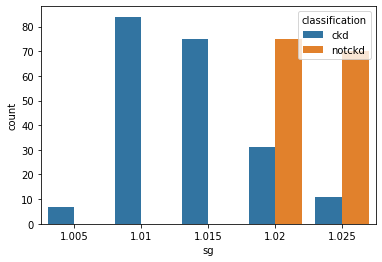

In [72]:
sns.countplot(x='sg',data=data3,hue='classification')# patients with sg value 1.02 and 1.025 have a high chance of not having the disease

<AxesSubplot:xlabel='sg', ylabel='count'>

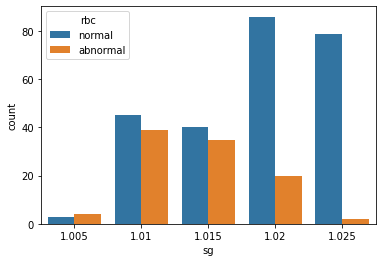

In [73]:
sns.countplot(x='sg',data=data3,hue='rbc')# patients with sg value 1.02 and 1.025 have a high chance of not having normal rbc

<AxesSubplot:xlabel='sg', ylabel='count'>

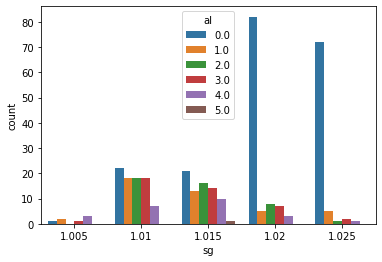

In [74]:
sns.countplot(x='sg',data=data3,hue='al')# patients with sg value 1.02 and 1.025 have a high chance of having 0 albumin

<AxesSubplot:xlabel='sg', ylabel='count'>

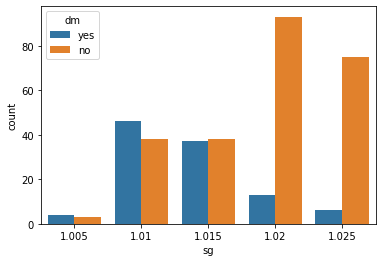

In [75]:
sns.countplot(x='sg',data=data3,hue='dm')# patients with sg value 1.02 and 1.025 have a high chance of not having dm

In [76]:
data3['sg'].describe()

count    353.000000
mean       1.017408
std        0.005717
min        1.005000
25%        1.010000
50%        1.020000
75%        1.020000
max        1.025000
Name: sg, dtype: float64

In [77]:
data3[data3['sg'].isna()]['classification'].value_counts()
# Since most of the nan records of sg are having classification as ckd .We cant just replace the nan with the median value instead 
# We can use Random Forest to impute nan the values

ckd       42
notckd     5
Name: classification, dtype: int64

In [78]:
data3['sg'].value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

In [79]:
def Cat_Encode(val):
    if val ==1.005:
        return 0
    elif val==1.010:
        return 1
    elif val == 1.015:
        return 2
    elif val ==1.020:
        return 3
    elif val ==1.025:
        return 4
    else:
        return val

In [80]:
def Back_to_Cat(val):
    if val ==0:
        return 1.005
    elif val==1:
        return 1.010
    elif val == 2:
        return 1.015
    elif val ==3:
        return 1.020
    elif val ==4:
        return 1.025
    else:
        return val

In [81]:
x_test=data3[data3['sg'].isna()]
x_train=data3[data3['sg'].notna()]
x_train_selected=x_train[['classification','htn','dm','pc','rbc']]
x_test_selected=x_test[['classification','htn','dm','pc','rbc']]
x_train_selected_dum=pd.get_dummies(x_train_selected,drop_first=True)
x_test_selected_dum=pd.get_dummies(x_test_selected,drop_first=True)
y_train=data2[data2['sg'].notna()]['sg']
y_train_df=pd.DataFrame(y_train,columns=['sg'])
y_train_df['sg']=y_train_df['sg'].apply(Cat_Encode)
rf=RandomForestClassifier()
rf.fit(x_train_selected_dum,y_train_df['sg'])
nan_pred=rf.predict(x_test_selected_dum)
nan_pred_df=pd.DataFrame(nan_pred,columns=['sg'])
nan_pred_df['sg']=nan_pred_df['sg'].apply(Back_to_Cat)
part1=pd.concat([x_train[['sg']],x_train.drop('sg',axis=1)],axis=1)
part2=pd.concat([nan_pred_df.reset_index(drop=True),x_test.drop('sg',axis=1).reset_index(drop=True)],axis=1)
part3=pd.concat([part1,part2],axis=0)
data4=part3.reset_index(drop=True)

In [82]:
data4['sg'].value_counts()

1.020    139
1.025     89
1.010     89
1.015     76
1.005      7
Name: sg, dtype: int64

In [83]:
data4['sg'].isnull().sum()

0

In [84]:
#most of the nans of al su and sg are occuring in the same indices
data4['al'].value_counts()

0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64

In [85]:
corr_data=pd.get_dummies(data4[categorical_features+discrete_num_feature],drop_first=True)
corr_data.corr()['al'].nlargest(len(categorical_features+discrete_num_feature))
# al is having a high correlation with the classification,rbc,al,htn,pc and dm

al                       1.000000
htn_yes                  0.527158
pe_yes                   0.477744
dm_yes                   0.415250
pcc_present              0.402831
ba_present               0.369254
appet_poor               0.358095
ane_yes                  0.321677
su                       0.269305
cad_yes                  0.269035
bp                       0.160641
rbc_normal              -0.232134
sg                      -0.464790
pc_normal               -0.543504
classification_notckd   -0.627090
Name: al, dtype: float64

<AxesSubplot:xlabel='al', ylabel='count'>

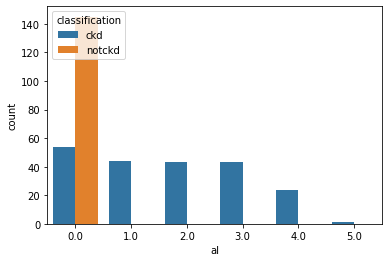

In [86]:
# a kidney patient may have lower albumin level
sns.countplot(x='al',data=data4,hue='classification')

<AxesSubplot:xlabel='al', ylabel='count'>

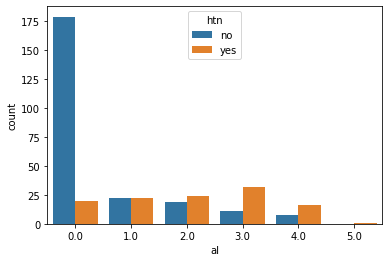

In [87]:
sns.countplot(x='al',data=data4,hue='htn')

<AxesSubplot:xlabel='al', ylabel='count'>

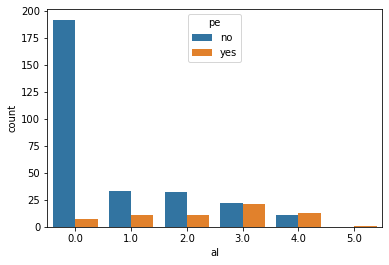

In [88]:
sns.countplot(x='al',data=data4,hue='pe')

<AxesSubplot:xlabel='al', ylabel='count'>

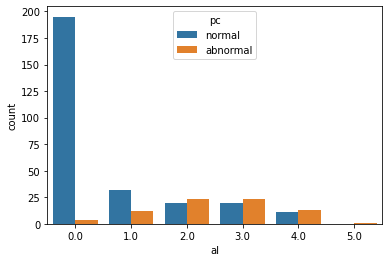

In [89]:
sns.countplot(x='al',data=data4,hue='pc')

In [90]:
data4[data4['al'].isna()]['classification'].value_counts()

ckd       41
notckd     5
Name: classification, dtype: int64

In [91]:
x_test=data4[data4['al'].isna()]
x_train=data4[data4['al'].notna()]
x_train_selected=x_train[['classification','htn','pe','pc']]
x_test_selected=x_test[['classification','htn','pe','pc']]
x_train_selected_dum=pd.get_dummies(x_train_selected,drop_first=True)
x_test_selected_dum=pd.get_dummies(x_test_selected,drop_first=True)
x_test_selected_dum['pc']=x_test_selected_dum['htn_yes'].apply(lambda x: 1)
y_train=data2[data2['al'].notna()]['al']
y_train_df=pd.DataFrame(y_train,columns=['sg'])
y_train_df['sg']=y_train_df['sg'].apply(Cat_Encode)
rf=RandomForestClassifier()
rf.fit(x_train_selected_dum,y_train)
nan_pred=rf.predict(x_test_selected_dum)
nan_pred_df=pd.DataFrame(nan_pred,columns=['al'])
# nan_pred_df['al']=nan_pred_df['al'].apply(Back_to_Cat)
part1=pd.concat([x_train[['al']],x_train.drop('al',axis=1)],axis=1)
part2=pd.concat([nan_pred_df.reset_index(drop=True),x_test.drop('al',axis=1).reset_index(drop=True)],axis=1)
part3=pd.concat([part1,part2],axis=0)
data5=part3.reset_index(drop=True)

In [92]:
data5['al'].value_counts()

0.0    245
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64

In [93]:
data5['su'].value_counts()

0.0    290
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: su, dtype: int64

In [94]:
data5['su'].isnull().sum()

49

In [95]:
# Replacing the nan of su with the mode
data5['su']=data5['su'].fillna(0)
data5['su'].isnull().sum()

0

In [96]:
data5['su'].value_counts()

0.0    339
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: su, dtype: int64

In [97]:
# Fixing the nan of the continuous features
data5[continuous_num_feature].isnull().sum()

age       9
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

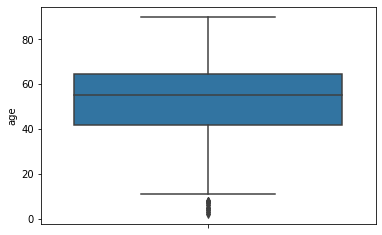

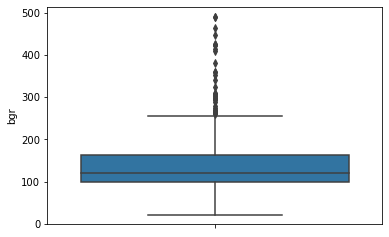

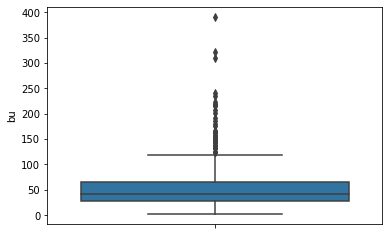

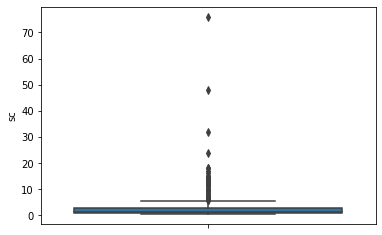

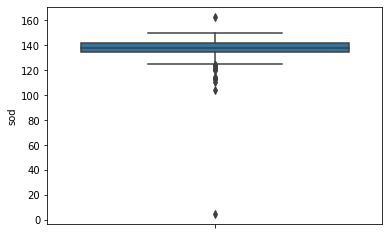

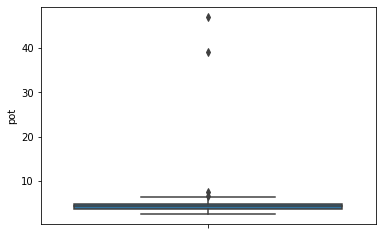

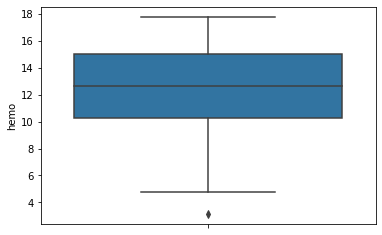

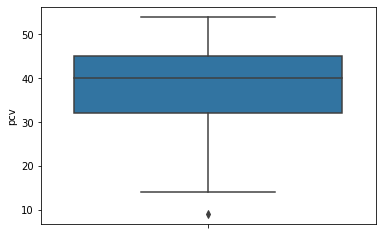

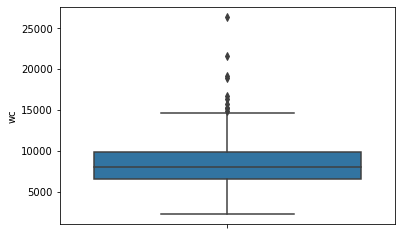

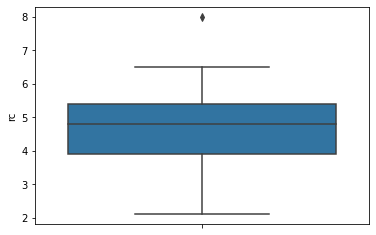

In [98]:
for feature in continuous_num_feature:
    sns.boxplot(y=feature,data=df)
    plt.show()

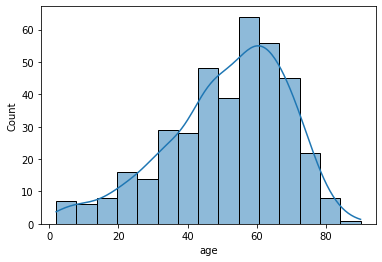

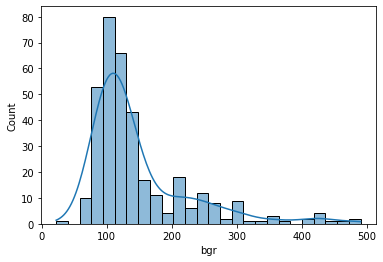

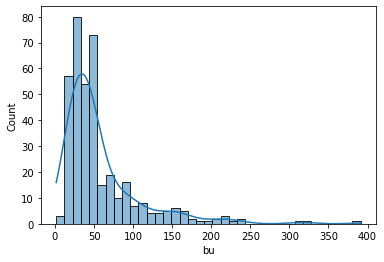

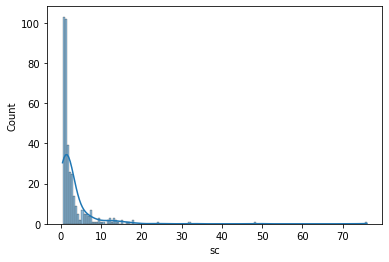

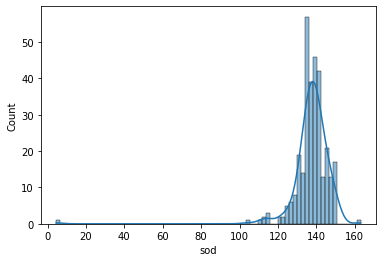

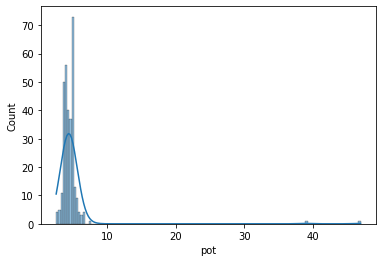

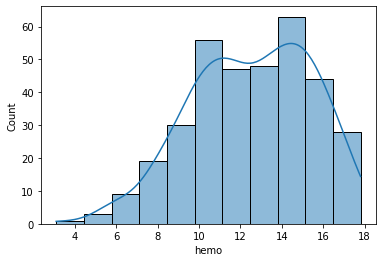

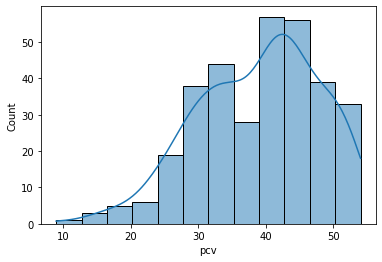

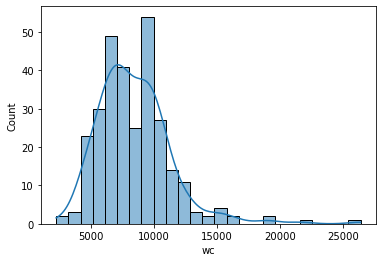

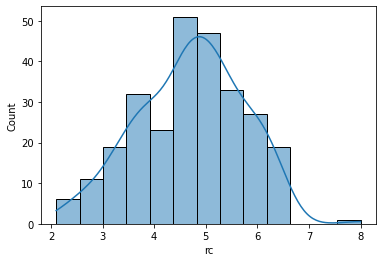

In [99]:
for feature in continuous_num_feature:
    sns.histplot(x=feature,data=df,kde=True)
    plt.show()

<AxesSubplot:>

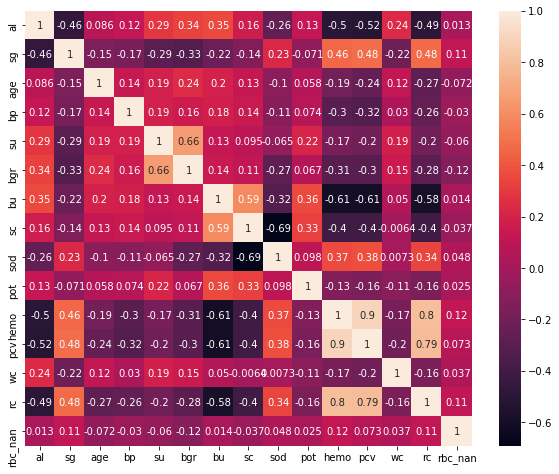

In [100]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data5.corr(),annot=True)

In [101]:
discrete_num_feature

['bp', 'sg', 'al', 'su']

In [102]:
data5[data5['age'].isna()]

,al,sg,rbc,pc,age,bp,su,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,rbc_nan
29,2.0,1.015,abnormal,abnormal,NaN,100.0,0.0,notpresent,notpresent,129.0,107.0,6.7,132.0,4.4,4.8,14.0,6300.0,NaN,yes,no,no,good,yes,yes,ckd,0
41,3.0,1.015,abnormal,abnormal,NaN,60.0,0.0,notpresent,notpresent,NaN,34.0,1.2,NaN,NaN,10.8,33.0,NaN,NaN,no,no,no,good,no,no,ckd,1
43,4.0,1.015,abnormal,normal,NaN,70.0,0.0,notpresent,notpresent,104.0,16.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,good,yes,no,ckd,0
75,3.0,1.010,normal,normal,NaN,70.0,0.0,notpresent,notpresent,110.0,115.0,6.0,134.0,2.7,9.1,26.0,9200.0,3.4,yes,yes,no,poor,no,no,ckd,1
307,0.0,1.010,normal,normal,NaN,70.0,2.0,notpresent,notpresent,220.0,68.0,2.8,NaN,NaN,8.7,27.0,NaN,NaN,yes,yes,no,good,no,yes,ckd,0
341,0.0,1.020,abnormal,normal,NaN,70.0,0.0,notpresent,notpresent,219.0,36.0,1.3,139.0,3.7,12.5,37.0,9800.0,4.4,no,no,no,good,no,no,ckd,0
362,0.0,1.020,normal,normal,NaN,70.0,0.0,notpresent,notpresent,93.0,155.0,7.3,132.0,4.9,NaN,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd,1
387,0.0,1.020,normal,normal,NaN,90.0,0.0,notpresent,notpresent,207.0,80.0,6.8,142.0,5.5,8.5,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd,0
396,0.0,1.010,normal,normal,NaN,80.0,0.0,notpresent,notpresent,100.0,49.0,1.0,140.0,5.0,16.3,53.0,8500.0,4.9,no,no,no,good,no,no,notckd,0


In [103]:
# Filling the Nan of age feature with median
data5['age']=data5['age'].fillna(data5['age'].median())
data5['age'].isnull().sum()

0

In [104]:
data6=data5.copy()

In [105]:
data5[continuous_num_feature].isnull().sum()

age       0
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

In [106]:
# Using KNN Imputer for imputing the missing values of bu and sc
from sklearn.impute import KNNImputer
scbu=data5[['sc','bu']]
imputer = KNNImputer(weights='distance')
scbu_np = imputer.fit_transform(scbu)
sc_bu=pd.DataFrame(scbu_np,columns=['sc','bu'])
sc_bu.isnull().sum()

sc    0
bu    0
dtype: int64

In [107]:
data7=data6.drop(['sc','bu'],axis=1)
data8=pd.concat([data7,sc_bu],axis=1)

In [108]:
data8[continuous_num_feature].isnull().sum()

age       0
bgr      44
bu        0
sc        0
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

In [109]:
def IQR(df,feature):
    outliers=[]
    q1,q3=np.percentile(df[feature].dropna(),[25,75])
    upper=q3 + 1.5*(q3-q1)
    lower=q1 - 1.5*(q3-q1)
    for i in range(len(df[feature])):
        if df.loc[i,feature] < lower or df.loc[i,feature] > upper:
            outliers.append(df.loc[i,feature])
    return outliers

In [110]:
# Checking the complete record of outliers
def Outlier_Record(data,iqr,feature):
    record=[]
    for i in range(len(data[feature])):
        if data.loc[i,feature] in iqr:
            record.append(data.loc[i,:])
    return record

In [111]:
# Checking the full record where bgr has outliers
bgr=pd.DataFrame(Outlier_Record(data8,IQR(data8,'bgr'),'bgr'),columns=data8.columns)
bgr
# Most of the outliers of bgr are causing ckd

,al,sg,rbc,pc,age,bp,su,pcc,ba,bgr,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,rbc_nan,sc,bu
0,2.0,1.010,normal,normal,62.0,80.0,3.0,notpresent,notpresent,423.0,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd,1,1.800000,53.000000
3,2.0,1.015,normal,abnormal,24.0,80.0,4.0,notpresent,notpresent,410.0,NaN,NaN,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd,0,1.100000,31.000000
6,3.0,1.010,abnormal,abnormal,63.0,70.0,0.0,present,notpresent,380.0,131.0,4.2,10.8,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd,1,2.700000,60.000000
11,3.0,1.010,normal,abnormal,69.0,70.0,4.0,notpresent,notpresent,264.0,130.0,4.0,12.5,37.0,9600.0,4.1,yes,yes,yes,good,yes,no,ckd,0,2.700000,87.000000
14,2.0,1.020,abnormal,normal,65.0,90.0,1.0,notpresent,notpresent,270.0,NaN,NaN,12.0,36.0,9800.0,4.9,yes,yes,no,poor,no,yes,ckd,0,2.000000,39.000000
27,3.0,1.020,normal,abnormal,45.0,80.0,0.0,notpresent,notpresent,425.0,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,poor,no,no,ckd,0,3.072454,57.425722
35,2.0,1.010,normal,normal,63.0,100.0,2.0,notpresent,present,280.0,143.0,3.5,13.0,40.0,9800.0,4.2,yes,no,yes,good,no,no,ckd,0,3.200000,35.000000
38,3.0,1.010,abnormal,abnormal,73.0,100.0,2.0,present,notpresent,295.0,140.0,2.9,9.2,30.0,7000.0,3.2,yes,yes,yes,poor,no,no,ckd,0,5.600000,90.000000
48,2.0,1.010,normal,abnormal,45.0,60.0,0.0,present,notpresent,268.0,134.0,5.1,10.0,29.0,9200.0,NaN,yes,yes,no,good,no,no,ckd,0,4.000000,86.000000
54,3.0,1.010,normal,abnormal,60.0,60.0,1.0,present,notpresent,288.0,130.0,3.0,7.9,25.0,15200.0,3.0,yes,no,no,poor,no,yes,ckd,0,1.700000,36.000000


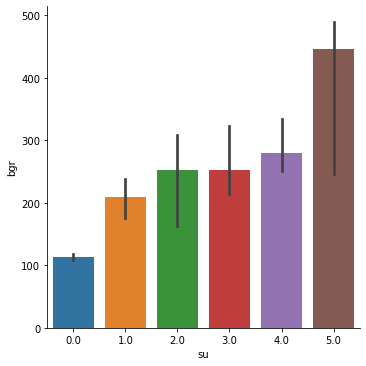

In [112]:
sns.catplot(x='su',y='bgr',data=data8,kind='bar',estimator=np.median)

In [113]:
# Replacing the nan of bgr based on its median value in each category of su
for i in range(len(data8['bgr'])):
    if np.isnan(data8.loc[i,'bgr'])==True:
        if data8.loc[i,'su']==0:
            data8.loc[i,'bgr']=110
        elif data8.loc[i,'su']==1:
            data8.loc[i,'bgr']=210
        elif data8.loc[i,'su']==2:
            data8.loc[i,'bgr']=260
        elif data8.loc[i,'su']==3:
            data8.loc[i,'bgr']=265
        elif data8.loc[i,'su']==4:
            data8.loc[i,'bgr']=280
        else:
             data8.loc[i,'bgr']=430
data8['bgr'].isnull().sum()

0

In [114]:
data8[continuous_num_feature].isnull().sum()

age       0
bgr       0
bu        0
sc        0
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

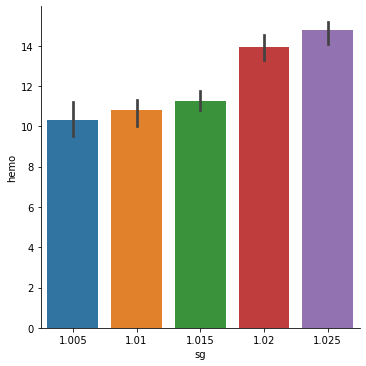

In [115]:
sns.catplot(x='sg',y='hemo',data=data8,kind='bar',estimator=np.median)

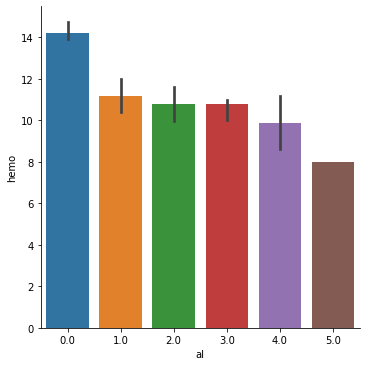

In [116]:
sns.catplot(x='al',y='hemo',data=data8,kind='bar',estimator=np.median)

<AxesSubplot:xlabel='hemo', ylabel='bu'>

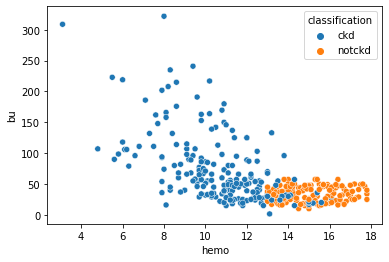

In [117]:
# relationship between bu and hemo
sns.scatterplot(x='hemo',y='bu',data=data8,hue='classification')
# for a normal person bu will be less and hemo will be high 

In [118]:
# Using knn imputer to impute the nan of sod pot hemo pcv with the help of age ,bgr ,bu,sc and categorical numerical features
# Using KNN Imputer for imputing the missing values of bu and sc
from sklearn.impute import KNNImputer
nan_df=data8[discrete_num_feature+['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv']]
imputer = KNNImputer(weights='distance')
nan_np = imputer.fit_transform(nan_df)
conti=pd.DataFrame(nan_np,columns=(discrete_num_feature+['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv']))
conti.isnull().sum()

bp      0
sg      0
al      0
su      0
age     0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
dtype: int64

In [119]:
conti.describe()

,bp,sg,al,su,age,bgr,bu,sc,sod,pot,hemo,pcv
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.575000,1.017675,0.90000,0.395000,51.562500,146.177500,57.666013,3.067123,137.678671,4.614043,12.499133,38.532745
std,13.489785,0.005583,1.31313,1.040038,16.982996,77.027522,49.624673,5.618502,9.369044,2.876893,2.827906,8.715291
min,50.000000,1.005000,0.00000,0.000000,2.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000
25%,70.000000,1.015000,0.00000,0.000000,42.000000,101.000000,27.000000,0.900000,135.000000,3.900000,10.400000,32.000000
50%,80.000000,1.020000,0.00000,0.000000,55.000000,117.000000,44.000000,1.400000,138.190552,4.300000,12.624812,40.000000
75%,80.000000,1.020000,2.00000,0.000000,64.000000,158.000000,65.250000,3.072454,141.946775,4.900000,14.800000,45.000000
max,180.000000,1.025000,5.00000,5.000000,90.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000


In [120]:
data9=data8.drop(conti.columns,axis=1)
data10=pd.concat([data9,conti],axis=1)

<AxesSubplot:xlabel='rc', ylabel='hemo'>

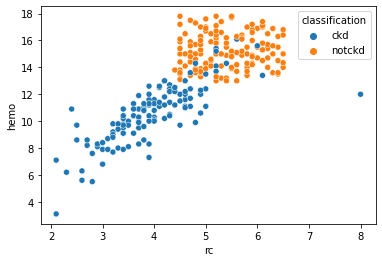

In [121]:
sns.scatterplot(x='rc',data=data10,y='hemo',hue='classification')
# if the rc and hemo is high then it is notckd

<AxesSubplot:xlabel='rc', ylabel='pcv'>

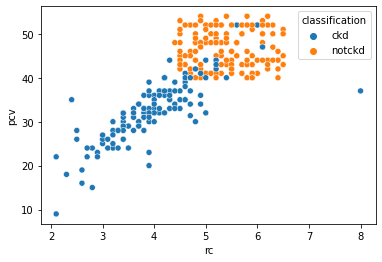

In [122]:
sns.scatterplot(x='rc',data=data10,y='pcv',hue='classification')
# if the rc and pcv is high then it is notckd

<AxesSubplot:xlabel='rc', ylabel='bu'>

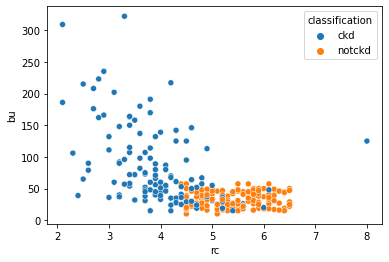

In [123]:
sns.scatterplot(x='rc',data=data10,y='bu',hue='classification')
# if the rc is high and bu is low then it is notckd

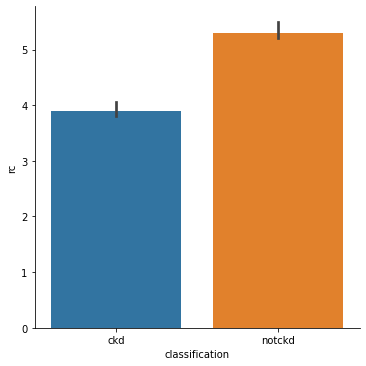

In [124]:
sns.catplot(x='classification',y='rc',data=data10,kind='bar',estimator=np.median)
# The median value of rc for a notckd is above 5 and that for a ckd is below 4

In [125]:
# Creating a new feature to represent nan of rc
data10['rc_nan']=np.where(data10['rc'].isna(),1,0)
data10['rc_nan'].value_counts()

0    269
1    131
Name: rc_nan, dtype: int64

In [126]:
# Using KNN imputer for imputing the nan of rc
nan_df=data10[[ 'hemo', 'pcv', 'bu', 'rc']]
imputer = KNNImputer(weights='distance')
nan_np = imputer.fit_transform(nan_df)
rc=pd.DataFrame(nan_np,columns=(['hemo', 'pcv', 'bu', 'rc']))
rc.isnull().sum()

hemo    0
pcv     0
bu      0
rc      0
dtype: int64

In [127]:
data11=pd.concat([rc[['rc']],data10.drop(['rc'],axis=1)],axis=1)

In [128]:
# Creating a new feature to represent nan of wc
data11['wc_nan']=np.where(data11['wc'].isna(),1,0)
data11['wc_nan'].value_counts()

0    294
1    106
Name: wc_nan, dtype: int64

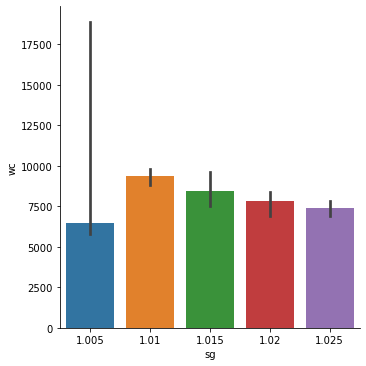

In [129]:
sns.catplot(y='wc',data=data11,kind='bar',x='sg',estimator=np.median)

In [130]:
data11[['wc']].describe()

,wc
count,294.000000
mean,8406.122449
std,2944.474190
min,2200.000000
25%,6500.000000
50%,8000.000000
75%,9800.000000
max,26400.000000


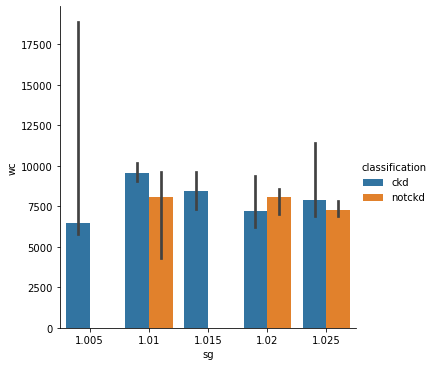

In [131]:
sns.catplot(y='wc',data=data11,kind='bar',hue='classification',x='sg',estimator=np.median)

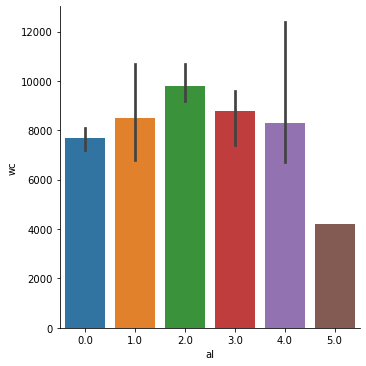

In [132]:
sns.catplot(y='wc',data=data11,kind='bar',x='al',estimator=np.median)

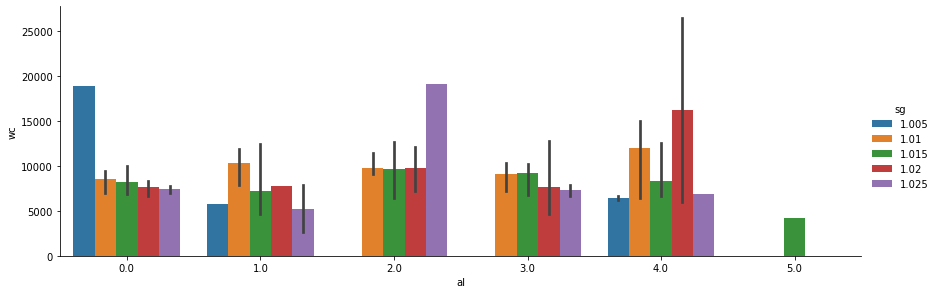

In [133]:
sns.catplot(x='al',y='wc',hue='sg',data=data11,kind='bar',height=4,aspect=3,estimator=np.median)

In [134]:
data11.groupby(by='sg').median()['wc']

sg
1.005    6450.0
1.010    9400.0
1.015    8450.0
1.020    7850.0
1.025    7400.0
Name: wc, dtype: float64

In [135]:
# Replacing the nan of wc with its median value based on the sg
for i in range(len(data11['sg'])):
    if np.isnan(data11.loc[i,'wc'])==True:
        if data11.loc[i,'sg']==1.005:
            data11.loc[i,'wc']=6450
        elif data11.loc[i,'sg']==1.010:
            data11.loc[i,'wc']=9550
        elif data11.loc[i,'sg']==1.015:
            data11.loc[i,'wc']=8450
        elif data11.loc[i,'sg']==1.020:
            data11.loc[i,'wc']=7900
        else:
             data11.loc[i,'wc']=7400
data11['wc'].isnull().sum()

0

In [136]:
# Fixed all the nan values of the dataset

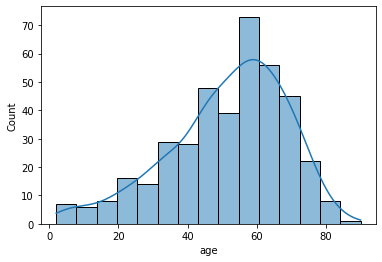

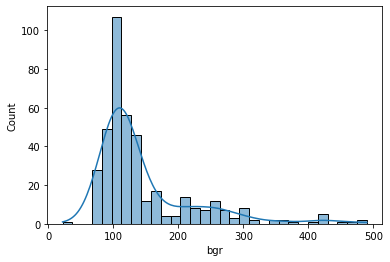

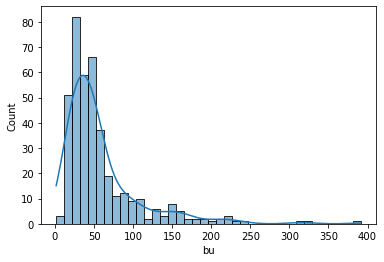

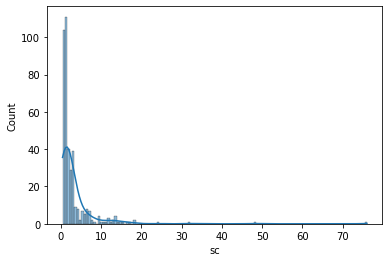

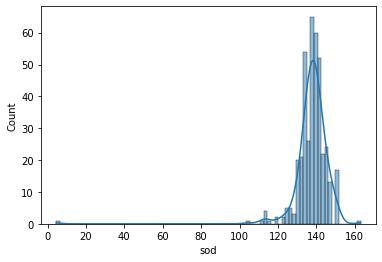

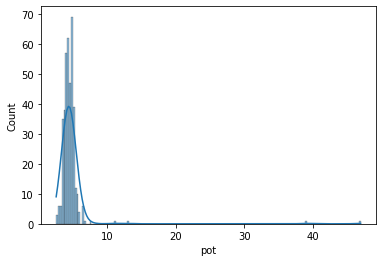

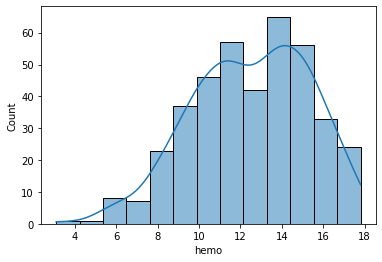

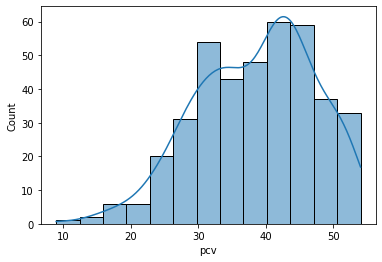

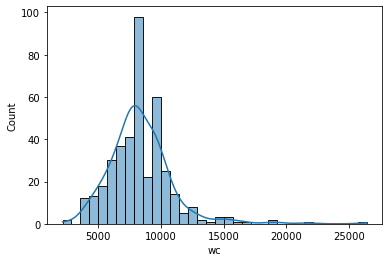

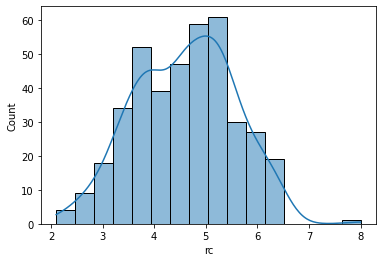

In [137]:
# Checking the distribution of the continuous features
for feature in continuous_num_feature:
    sns.histplot(x=feature,data=data11,kde=True)
    plt.show()

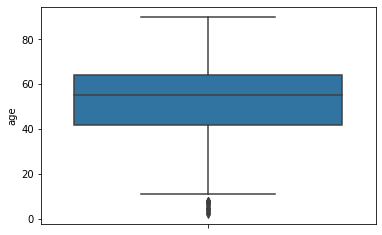

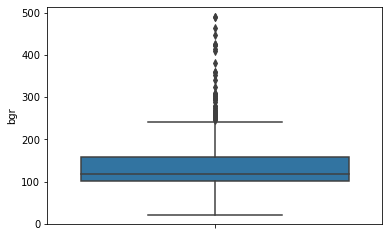

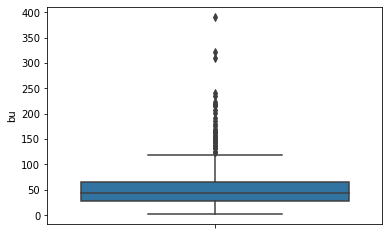

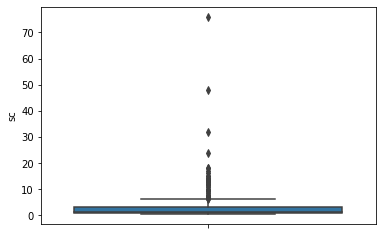

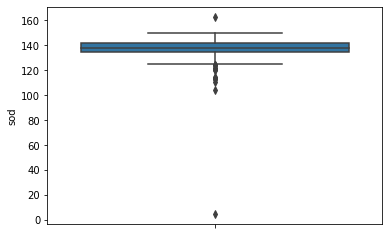

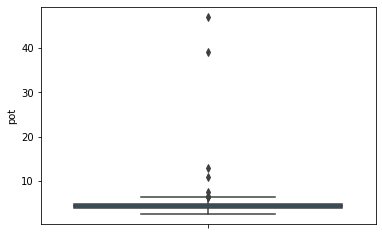

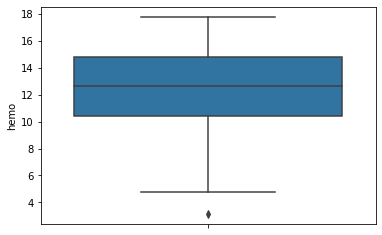

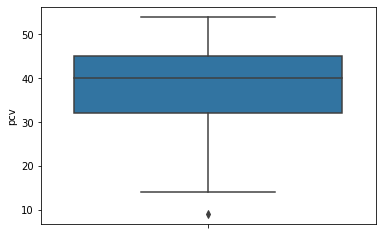

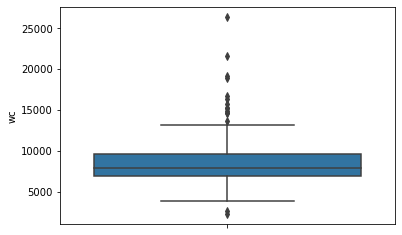

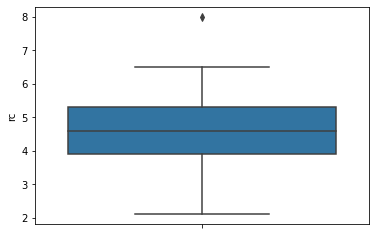

In [138]:
for feature in continuous_num_feature:
    sns.boxplot(y=feature,data=data11)
    plt.show()

In [139]:
# Replacing the extreme outliers with a given percentile value based on the domain knowledge 

<AxesSubplot:xlabel='sc', ylabel='Count'>

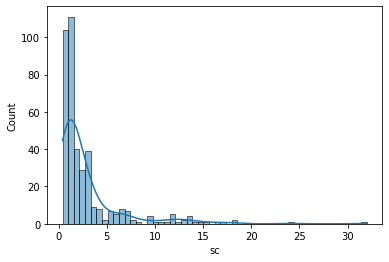

In [140]:
for i in range(len(data11['sc'])):
    if data11.loc[i,'sc']>40:
        data11.loc[i,'sc']=np.percentile(data11[['sc']],95)
sns.histplot(x='sc',data=data11,kde=True)

<AxesSubplot:xlabel='sod', ylabel='Count'>

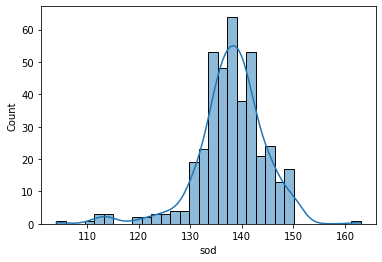

In [141]:
for i in range(len(data11['sod'])):
    if data11.loc[i,'sod']==min(data11['sod']):
        data11.loc[i,'sod']=np.percentile(data11[['sod']],1)
sns.histplot(x='sod',data=data11,kde=True)

<AxesSubplot:xlabel='pot', ylabel='Count'>

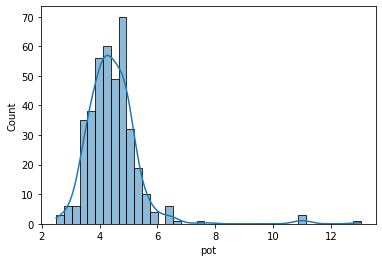

In [142]:
for i in range(len(data11['pot'])):
    if data11.loc[i,'pot']>=30:
        data11.loc[i,'pot']=11
sns.histplot(x='pot',data=data11,kde=True)

<AxesSubplot:xlabel='wc', ylabel='Count'>

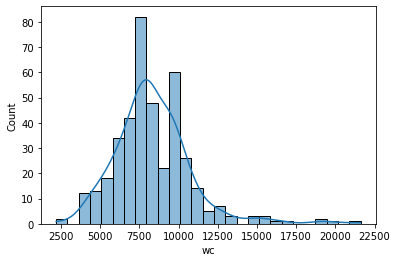

In [143]:
for i in range(len(data11['wc'])):
    if data11.loc[i,'wc']>=25000:
        data11.loc[i,'wc']=20000
sns.histplot(x='wc',data=data11,kde=True)

In [144]:
for feature in categorical_features:
    print(f"{feature} has {len(data11[feature].unique())} unique categories")

rbc has 2 unique categories
pc has 2 unique categories
pcc has 2 unique categories
ba has 2 unique categories
htn has 2 unique categories
dm has 2 unique categories
cad has 2 unique categories
appet has 2 unique categories
pe has 2 unique categories
ane has 2 unique categories
classification has 2 unique categories


In [145]:
# one hot encoding on the categorical features
one_hot_df=pd.get_dummies(data11[categorical_features],drop_first=True)

In [146]:
data12=data11.drop(categorical_features,axis=1)
data13=pd.concat([one_hot_df,data12],axis=1)

In [147]:
data13.head()
# Final dataset

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd,rc,wc,rbc_nan,bp,sg,al,su,age,bgr,bu,sc,sod,pot,hemo,pcv,rc_nan,wc_nan
0,1,1,0,0,0,1,0,1,0,1,0,4.141859,7500.0,1,80.0,1.010,2.0,3.0,62.0,423.0,53.0,1.8,134.399328,4.211382,9.6,31.0,1,0
1,1,0,1,0,1,0,0,1,1,1,0,3.900000,6700.0,1,70.0,1.005,4.0,0.0,48.0,117.0,56.0,3.8,111.000000,2.500000,11.2,32.0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,4.600000,7300.0,0,80.0,1.010,2.0,0.0,51.0,106.0,26.0,1.4,139.054248,4.106923,11.6,35.0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,5.000000,6900.0,0,80.0,1.015,2.0,4.0,24.0,410.0,31.0,1.1,132.311685,4.213940,12.4,44.0,0,0
4,1,0,1,0,1,1,0,0,0,1,0,4.000000,9600.0,0,100.0,1.015,3.0,0.0,52.0,138.0,60.0,1.9,141.736395,5.233297,10.8,33.0,0,0


In [148]:
x=data13.drop('classification_notckd',axis=1)
x.head()

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,rc,wc,rbc_nan,bp,sg,al,su,age,bgr,bu,sc,sod,pot,hemo,pcv,rc_nan,wc_nan
0,1,1,0,0,0,1,0,1,0,1,4.141859,7500.0,1,80.0,1.010,2.0,3.0,62.0,423.0,53.0,1.8,134.399328,4.211382,9.6,31.0,1,0
1,1,0,1,0,1,0,0,1,1,1,3.900000,6700.0,1,70.0,1.005,4.0,0.0,48.0,117.0,56.0,3.8,111.000000,2.500000,11.2,32.0,0,0
2,1,1,0,0,0,0,0,0,0,0,4.600000,7300.0,0,80.0,1.010,2.0,0.0,51.0,106.0,26.0,1.4,139.054248,4.106923,11.6,35.0,0,0
3,1,0,0,0,0,1,0,0,1,0,5.000000,6900.0,0,80.0,1.015,2.0,4.0,24.0,410.0,31.0,1.1,132.311685,4.213940,12.4,44.0,0,0
4,1,0,1,0,1,1,0,0,0,1,4.000000,9600.0,0,100.0,1.015,3.0,0.0,52.0,138.0,60.0,1.9,141.736395,5.233297,10.8,33.0,0,0


In [149]:
y=data13['classification_notckd']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classification_notckd, dtype: uint8

<AxesSubplot:>

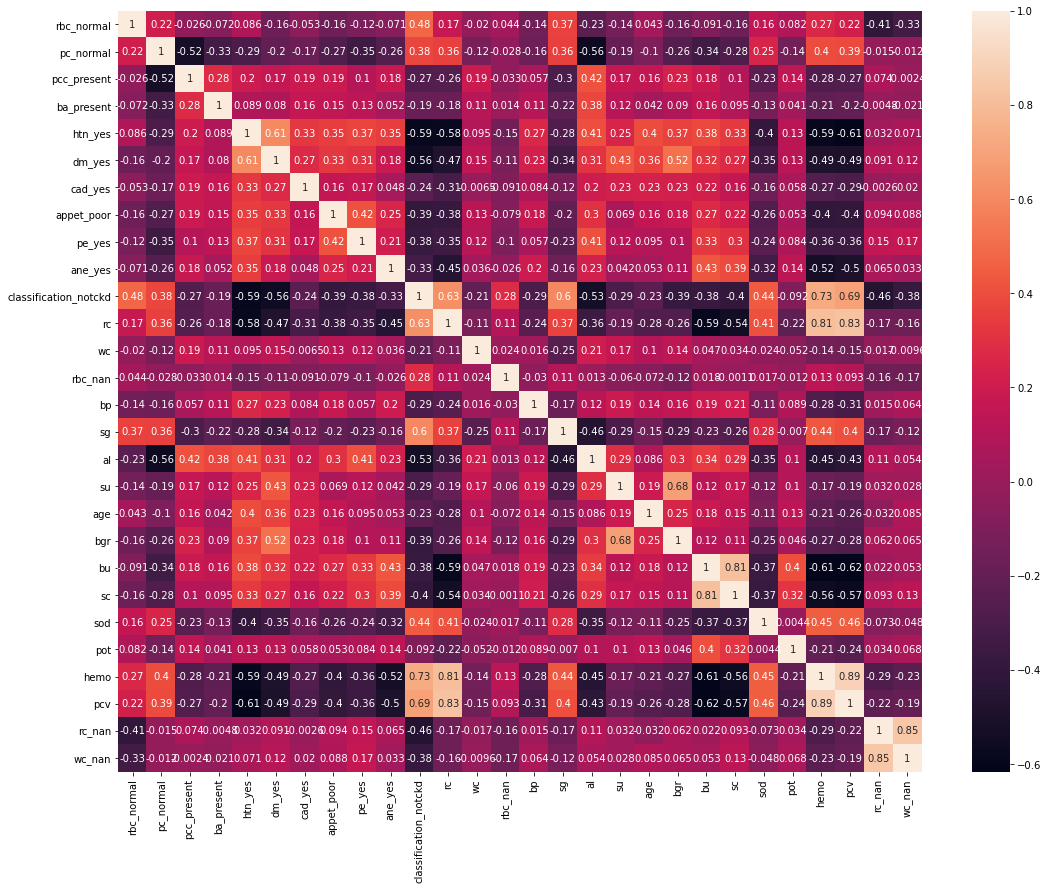

In [150]:
# Feature Selection
fig,ax=plt.subplots(figsize=(18,14))
sns.heatmap(data13.corr(),annot=True)

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((280, 27), (120, 27), (280,), (120,))

In [152]:
# pot , age ,ba_present ,wc are having the lowest correlation with the label

In [153]:
# Filter methods
# Performing mutual information
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(X_train,y_train)
mi

array([0.14880929, 0.11518786, 0.05310025, 0.02042786, 0.24089226,
       0.18439746, 0.04834023, 0.16618244, 0.09856734, 0.08638604,
       0.3868815 , 0.06819091, 0.03027055, 0.13926321, 0.30597823,
       0.26003157, 0.05592745, 0.09917804, 0.20754343, 0.16803257,
       0.3604697 , 0.25398083, 0.18013399, 0.42155179, 0.39681838,
       0.14371071, 0.10451215])

In [154]:
grp=pd.Series(mi)
grp.index=x.columns
c=grp.sort_values(ascending=True)

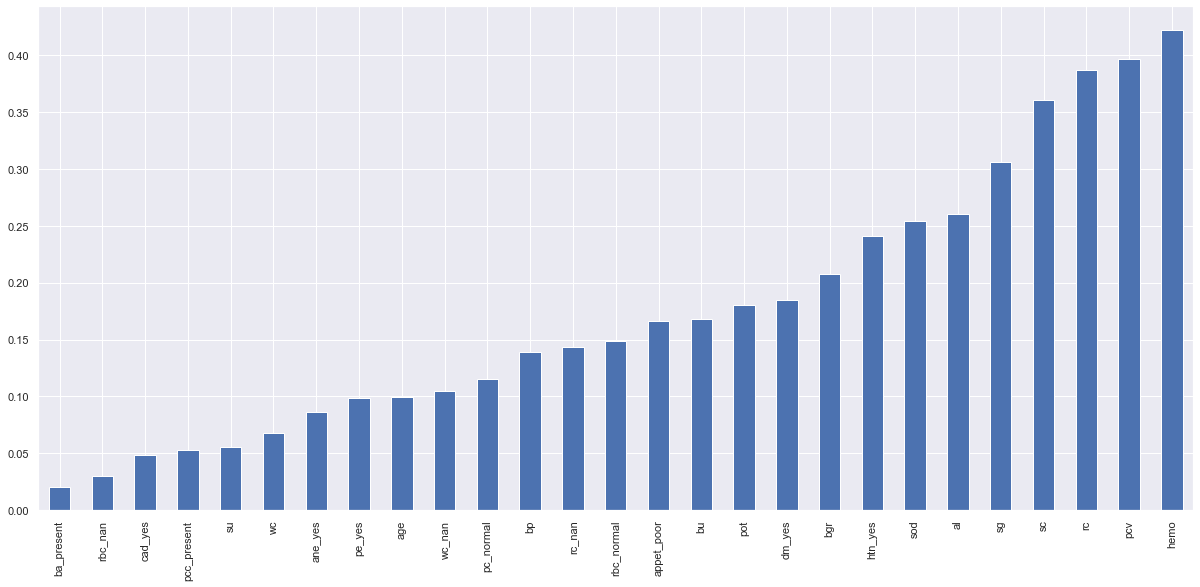

In [155]:
sns.set(rc={'figure.figsize':(20.7,9.27)})
c.plot.bar()
plt.show()

In [156]:
grp.nlargest(n=20,keep='first')# keeping the top 20 features important features

hemo          0.421552
pcv           0.396818
rc            0.386882
sc            0.360470
sg            0.305978
al            0.260032
sod           0.253981
htn_yes       0.240892
bgr           0.207543
dm_yes        0.184397
pot           0.180134
bu            0.168033
appet_poor    0.166182
rbc_normal    0.148809
rc_nan        0.143711
bp            0.139263
pc_normal     0.115188
wc_nan        0.104512
age           0.099178
pe_yes        0.098567
dtype: float64

In [157]:
# Performing ANOVA test
from sklearn.feature_selection import f_classif
sel=f_classif(X_train,y_train)
sel

(array([ 82.97596726,  43.94220238,  25.57337185,   9.4708256 ,
        167.45202559, 137.6232381 ,  18.82957043,  58.1362987 ,
         46.58855932,  28.68088077, 199.3092614 ,  14.51782391,
         30.33957116,  34.69089009, 191.05086814, 110.96756889,
         29.44153811,  25.99889295,  61.16981559,  41.21270606,
         45.95208441,  70.91226097,   2.85165563, 319.7128897 ,
        279.5668955 ,  73.75481135,  46.64418404]),
 array([1.68454975e-17, 1.75289830e-10, 7.74210279e-07, 2.29606430e-03,
        2.68126901e-30, 4.35916782e-26, 2.00269122e-05, 3.89062153e-13,
        5.48471540e-11, 1.79031241e-07, 1.72215359e-34, 1.70952855e-04,
        8.26011532e-08, 1.11310512e-08, 1.97237001e-33, 4.70270513e-22,
        1.25480385e-07, 6.32785368e-07, 1.09374978e-13, 5.87805869e-10,
        7.24579913e-11, 2.01517311e-15, 9.24011897e-02, 4.01612419e-48,
        6.52905119e-44, 6.42612590e-16, 5.35300968e-11]))

<AxesSubplot:>

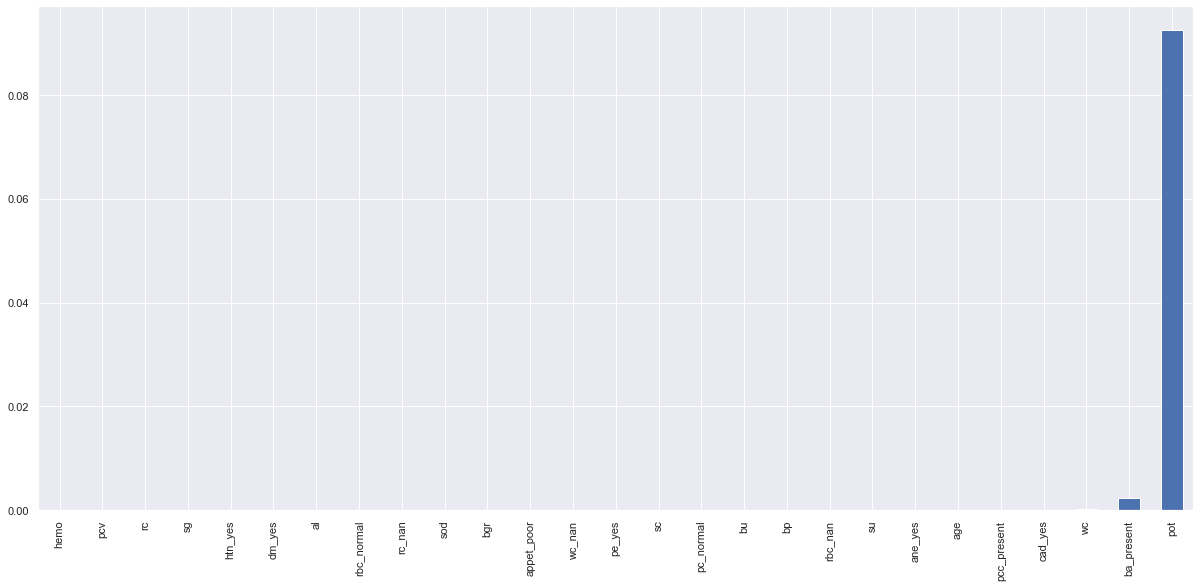

In [159]:
p_values=pd.Series(sel[1])
p_values.index=x.columns
p_values.sort_values(ascending =True,inplace=True)
p_values.plot.bar()

In [160]:
# Features whose p value is less than 0.05 are the important features
p_values[p_values<=0.05]

hemo           4.016124e-48
pcv            6.529051e-44
rc             1.722154e-34
sg             1.972370e-33
htn_yes        2.681269e-30
dm_yes         4.359168e-26
al             4.702705e-22
rbc_normal     1.684550e-17
rc_nan         6.426126e-16
sod            2.015173e-15
bgr            1.093750e-13
appet_poor     3.890622e-13
wc_nan         5.353010e-11
pe_yes         5.484715e-11
sc             7.245799e-11
pc_normal      1.752898e-10
bu             5.878059e-10
bp             1.113105e-08
rbc_nan        8.260115e-08
su             1.254804e-07
ane_yes        1.790312e-07
age            6.327854e-07
pcc_present    7.742103e-07
cad_yes        2.002691e-05
wc             1.709529e-04
ba_present     2.296064e-03
dtype: float64

In [161]:
# Removing pot from the train test set
X_train=X_train.drop('pot',axis=1)
X_test=X_test.drop('pot',axis=1)

In [164]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_scale=mms.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scale,columns=X_train.columns)
X_train_scaled.head()

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,rc,wc,rbc_nan,bp,sg,al,su,age,bgr,bu,sc,sod,hemo,pcv,rc_nan,wc_nan
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440678,0.302857,0.0,0.153846,1.00,0.0,0.0,0.400000,0.232906,0.114249,0.003175,0.653846,0.850340,0.711111,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474576,0.085714,1.0,0.230769,0.75,0.0,0.0,0.517647,0.213675,0.078306,0.022222,0.538462,0.945578,0.711111,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.338983,0.285714,1.0,0.307692,0.25,0.4,0.0,0.482353,0.164530,0.201540,0.050794,0.498949,0.544218,0.511111,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.644068,0.228571,0.0,0.076923,0.75,0.0,0.0,0.541176,0.228632,0.060334,0.022222,0.538462,0.959184,0.688889,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.146760,0.311429,0.0,0.230769,0.25,0.2,0.6,0.729412,0.341880,1.000000,1.000000,1.000000,0.233987,0.218827,1.0,1.0


In [165]:
X_test_scale=mms.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scale,columns=X_train.columns)
X_test_scaled.head()

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,rc,wc,rbc_nan,bp,sg,al,su,age,bgr,bu,sc,sod,hemo,pcv,rc_nan,wc_nan
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.559322,0.297143,0.0,0.153846,0.75,0.0,0.0,0.752941,0.130342,0.103979,0.022222,0.538462,0.891156,0.911111,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.305085,0.445714,0.0,0.153846,0.25,0.0,0.0,0.705882,0.151709,0.165597,0.034921,0.500000,0.578231,0.600000,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,-0.017143,0.0,0.153846,0.25,0.6,0.0,0.635294,0.115385,0.473684,0.460317,0.461538,0.272109,0.288889,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.491525,0.137143,1.0,0.076923,1.00,0.0,0.0,0.270588,0.121795,0.124519,0.000000,0.653846,0.986395,0.933333,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.203390,0.422857,0.0,0.153846,0.25,0.8,0.6,0.752941,0.410256,0.242619,0.184127,0.173077,0.428571,0.422222,0.0,0.0


In [166]:
# Doing crossvalidation on multiple models to get the best model
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

In [167]:
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
svc=SVC()
knn=KNeighborsClassifier()
xgb=xg.XGBClassifier()
scores=[[],[],[],[],[],[],[],[]]
classifiers=[lr,dt,rf,gb,ada,svc,knn,xgb]
kf = KFold(n_splits=4)
for train_index, test_index in kf.split(X_train_scaled):
    X_train_fold, X_test_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    for index,model in enumerate (classifiers):
        model.fit(X_train_fold,y_train_fold)
        p=model.predict(X_test_fold)
        acc=accuracy_score(y_test_fold,p)
        scores[index].append(acc)

C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Snehashis_Saheb\anaconda3\envs\Healthcare\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [168]:
for index,each in enumerate(scores):
    print(f"KFold accuracies of {classifiers[index]} : {each}")

KFold accuracies of LogisticRegression() : [1.0, 0.9714285714285714, 1.0, 1.0]
KFold accuracies of DecisionTreeClassifier() : [0.9428571428571428, 0.9857142857142858, 0.9571428571428572, 0.9714285714285714]
KFold accuracies of RandomForestClassifier() : [1.0, 1.0, 1.0, 1.0]
KFold accuracies of GradientBoostingClassifier() : [0.9285714285714286, 1.0, 0.9571428571428572, 1.0]
KFold accuracies of AdaBoostClassifier() : [1.0, 1.0, 1.0, 0.9857142857142858]
KFold accuracies of SVC() : [0.9857142857142858, 0.9857142857142858, 1.0, 1.0]
KFold accuracies of KNeighborsClassifier() : [1.0, 0.9428571428571428, 0.9714285714285714, 1.0]
KFold accuracies of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=

In [169]:
# Geting mean of each models
for index,each in enumerate(scores):
    print(f"Mean of KFold accuracies of {classifiers[index]} : {np.mean(each)*100}")

Mean of KFold accuracies of LogisticRegression() : 99.28571428571429
Mean of KFold accuracies of DecisionTreeClassifier() : 96.42857142857143
Mean of KFold accuracies of RandomForestClassifier() : 100.0
Mean of KFold accuracies of GradientBoostingClassifier() : 97.14285714285714
Mean of KFold accuracies of AdaBoostClassifier() : 99.64285714285714
Mean of KFold accuracies of SVC() : 99.28571428571429
Mean of KFold accuracies of KNeighborsClassifier() : 97.85714285714285
Mean of KFold accuracies of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, sub

In [170]:
# Random Forest
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
rf_model=RandomForestClassifier()
rf_model.fit(X_train_scaled,y_train)
rf_pred=rf_model.predict(X_test_scaled)
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

1.0
[[83  0]
 [ 0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        37

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [174]:
# SVC
svc_model=SVC()
svc_model.fit(X_train_scaled,y_train)
svc_pred=svc_model.predict(X_test_scaled)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

1.0
[[83  0]
 [ 0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        37

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [176]:
# Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(X_train_scaled,y_train)
lr_pred=lr_model.predict(X_test_scaled)
print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

1.0
[[83  0]
 [ 0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        37

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [177]:
# Ada Boost
ada_model=AdaBoostClassifier()
ada_model.fit(X_train_scaled,y_train)
ada_pred=ada_model.predict(X_test_scaled)
print(accuracy_score(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))
print(classification_report(y_test,ada_pred))

0.9916666666666667
[[82  1]
 [ 0 37]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       0.97      1.00      0.99        37

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [ ]:
# Final Model = Random Forest

In [178]:
import pickle
pickle.dump(mms,open("kidney_scaler.pkl",'wb'))
pickle.dump(rf_model, open("kidney_model.pkl", 'wb'))

In [179]:
X_test.head()

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,rc,wc,rbc_nan,bp,sg,al,su,age,bgr,bu,sc,sod,hemo,pcv,rc_nan,wc_nan
209,1,1,0,0,0,0,0,0,0,0,5.4,9300.0,0,70.0,1.020,0.0,0.0,69.0,83.0,42.0,1.2,139.0,16.2,50.0,0,0
280,0,1,0,0,0,1,0,0,0,0,3.9,11900.0,0,70.0,1.010,0.0,0.0,65.0,93.0,66.0,1.6,137.0,11.6,36.0,0,0
33,1,0,0,0,1,0,0,1,1,1,2.1,3800.0,0,70.0,1.010,3.0,0.0,59.0,76.0,186.0,15.0,135.0,7.1,22.0,0,0
210,1,1,0,0,0,0,0,0,0,0,5.0,6500.0,1,60.0,1.025,0.0,0.0,28.0,79.0,50.0,0.5,145.0,17.6,51.0,0,0
93,1,0,1,1,1,1,1,0,1,1,3.3,11500.0,0,70.0,1.010,4.0,3.0,69.0,214.0,96.0,6.3,120.0,9.4,28.0,0,0
